In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from utils import *
from sklearn.model_selection import train_test_split



c:\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Train & Test set data

In [271]:
datasets = ['MedicalImages',
 'Wafer',
 'WordSynonyms',
 'FiftyWords',
 'DistalPhalanxTW',
 'Phoneme',
 'ECG5000',
 'Earthquakes',
 'ProximalPhalanxTW',
 'DistalPhalanxOutlineAgeGroup',
 'MiddlePhalanxTW',
 'Worms',
 'MiddlePhalanxOutlineAgeGroup',
 'Symbols',
 'FacesUCR',
 'StarLightCurves',
 'SonyAIBORobotSurface1',
 'ChlorineConcentration',
 'OliveOil',
 'Lightning7',
 'ECG200',
 'ElectricDevices',
 'DiatomSizeReduction',
 'ProximalPhalanxOutlineCorrect',
 'Lightning2',
 'InsectEPGSmallTrain',
 'PLAID',
 'InsectEPGRegularTrain',
 'Mallat',
 'PhalangesOutlinesCorrect']

In [282]:
len(datasets)

30

In [269]:
train = list()
test = list()

for dataset in datasets:
    x_train,x_test,_,_ = get_data(dataset, '\t')
    train.append(x_train.shape[0])
    test.append(x_test.shape[1])
    
    
  

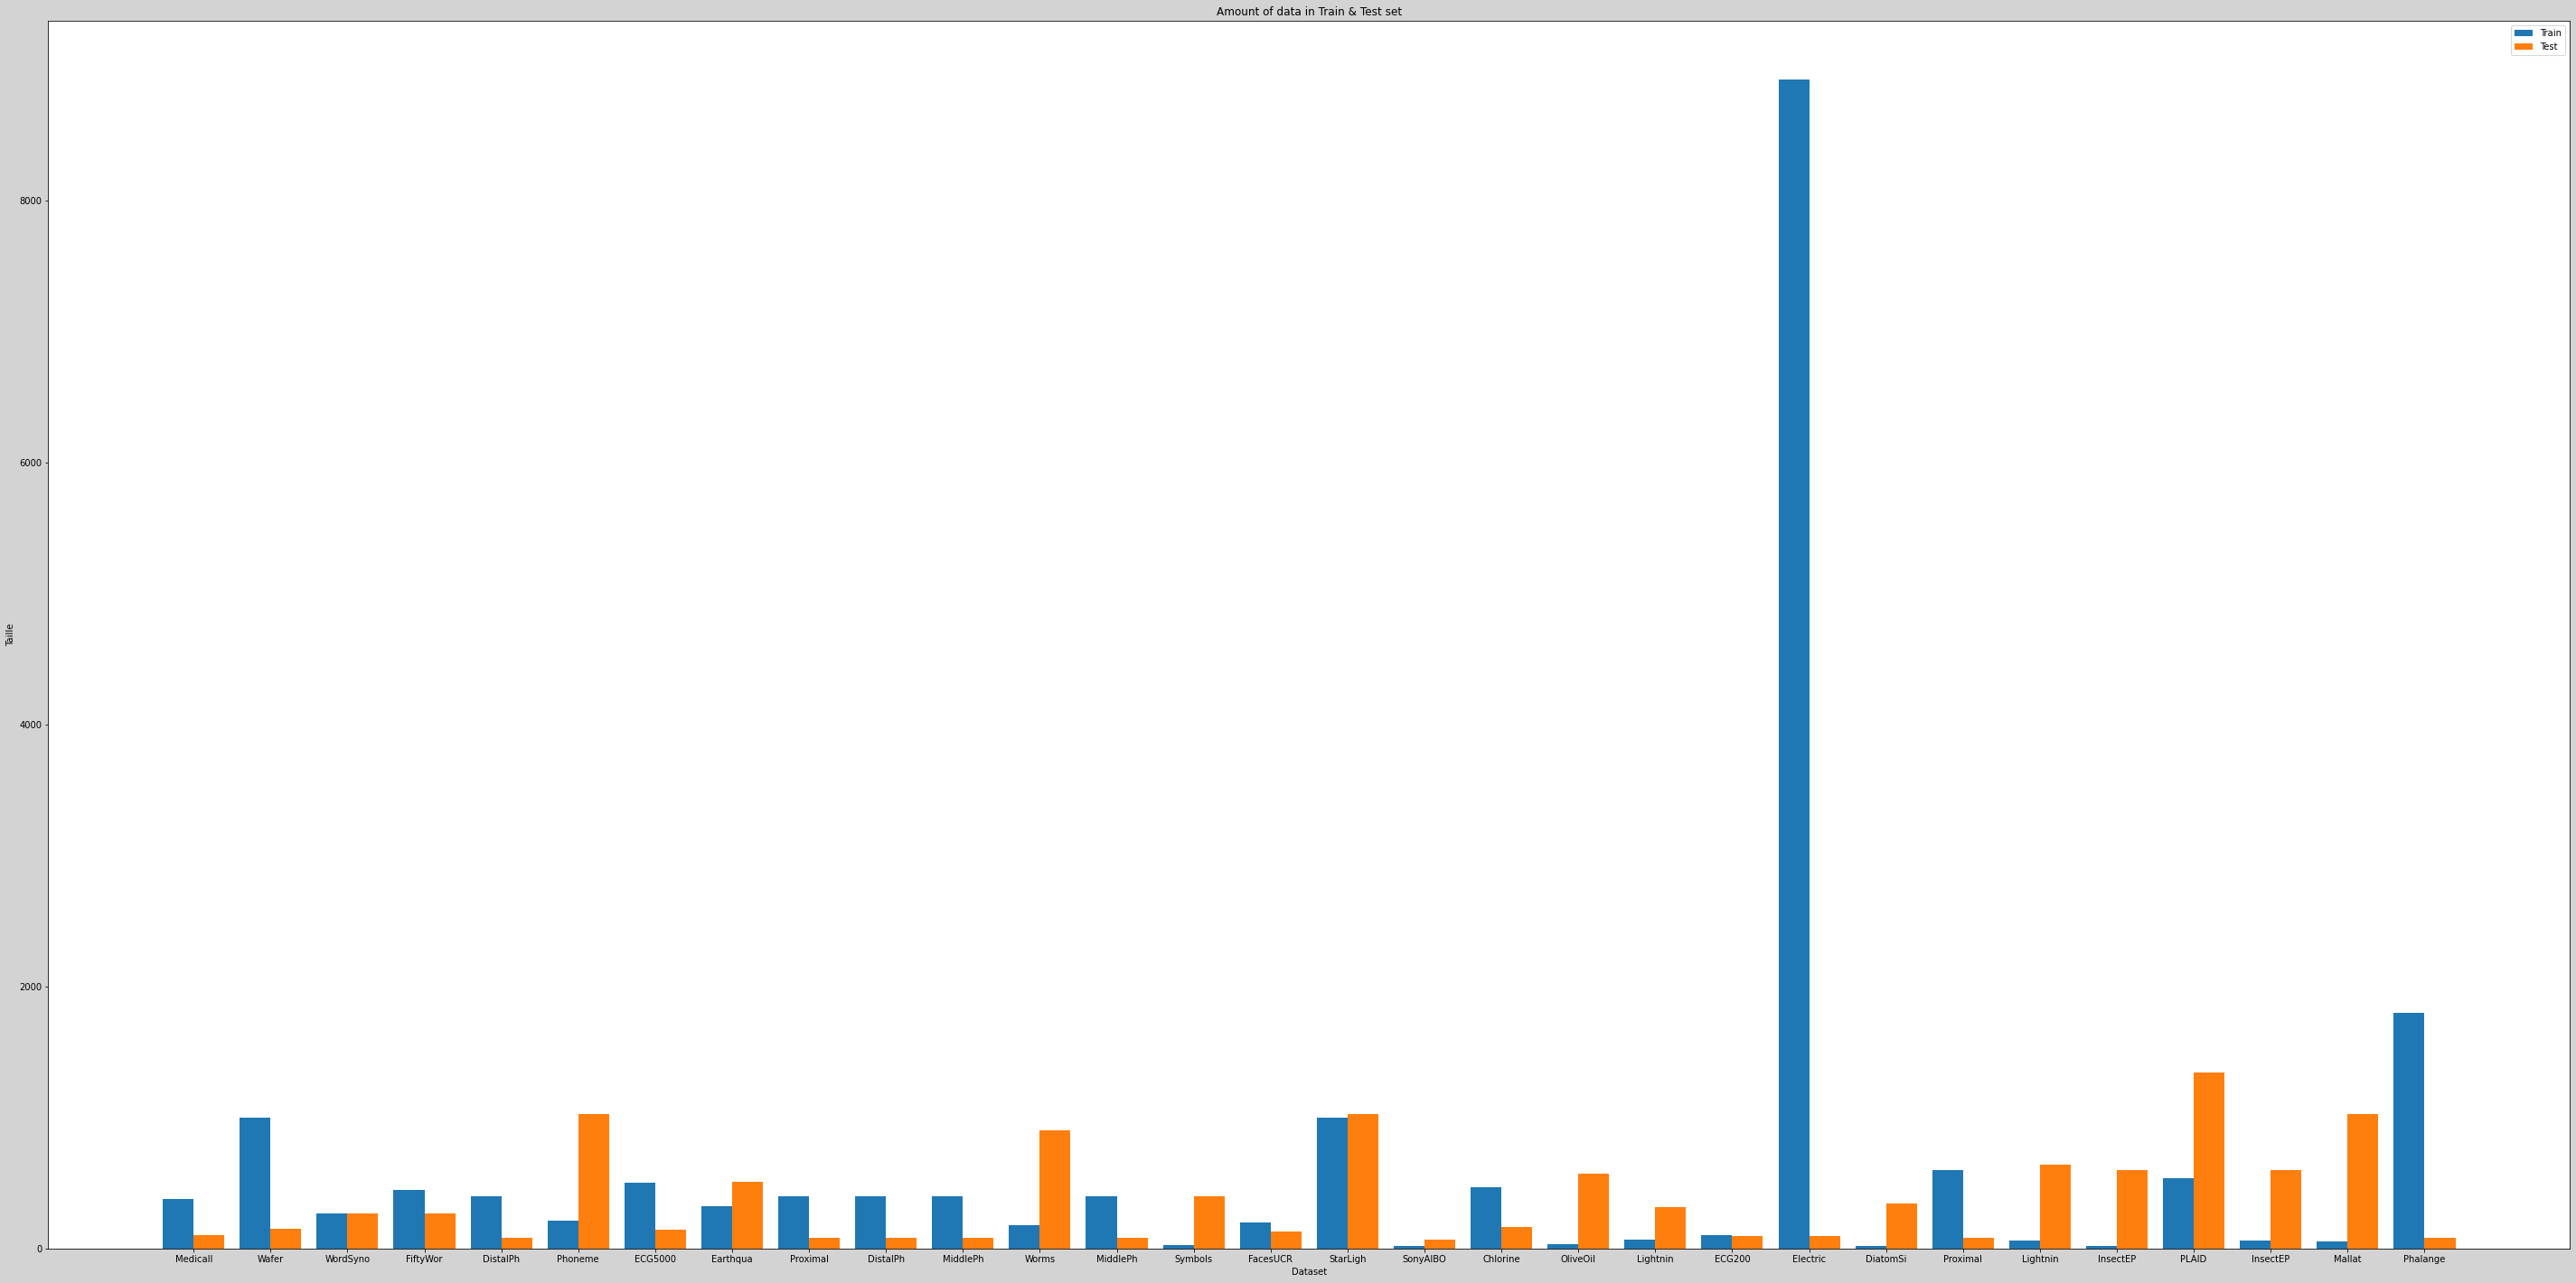

In [272]:

datasets = [elt[:8] for elt in datasets]

plt.figure(figsize=(50,25)).set_facecolor('lightgrey')

X_axis = np.arange(len(datasets))
  
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test')
plt.xticks(X_axis, datasets)
plt.xlabel("Dataset")
plt.ylabel("Taille")
plt.title("Amount of data in Train & Test set")
plt.legend()

In [4]:
dataset = 'DiatomSizeReduction'


In [5]:
x_train,x_test,y_train,y_test = get_data(dataset, '\t')

y_train = class_offset(y_train, dataset)
y_test = class_offset(y_test, dataset)
y_train

array([1., 2., 3., 2., 2., 1., 3., 2., 3., 0., 1., 2., 1., 3., 1., 1.])

In [6]:


x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, test_size=0.5)

print('train shape', x_train.shape)
print('validation shape', x_val.shape)
print('test shape', x_test.shape)



train shape (16, 345)
validation shape (153, 345)
test shape (153, 345)


In [7]:
def donut_visu(ax, data,name):
  recipe = [f'{round(data[i]/data.sum(),1)*100} % - Class {i}' for i in range(len(data))]


  wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

  bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
  kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

  for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

  ax.set_title(name)


In [8]:
_, rat_train = np.unique(y_train, return_counts=True)
print(rat_train)
_, rat_val = np.unique(y_val, return_counts=True)
print(rat_val)
_, rat_test = np.unique(y_test, return_counts=True)
print(rat_test)

[1 6 5 4]
[14 53 45 41]
[19 39 49 46]


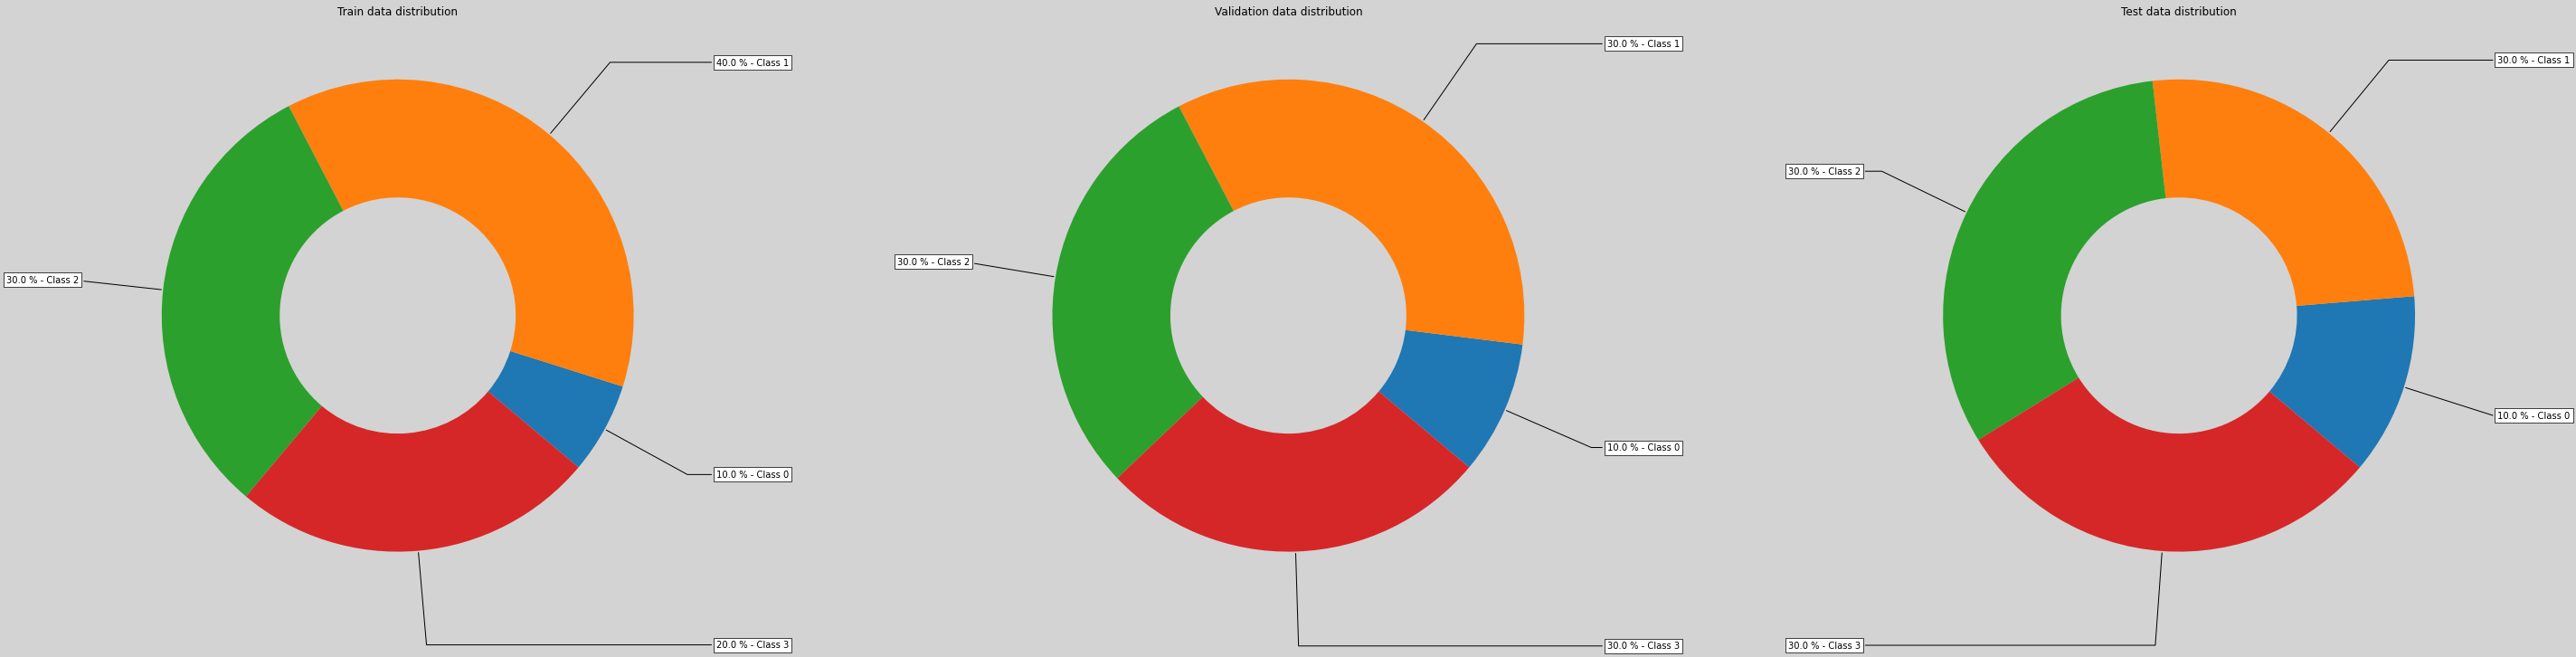

In [9]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(50, 12))

fig.set_facecolor('lightgrey')

donut_visu(ax0,rat_train,'Train data distribution')
donut_visu(ax1,rat_val,'Validation data distribution')
donut_visu(ax2,rat_test,'Test data distribution')

plt.show()

# Losses visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from trendfilter import trend_filter

c:\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Loss 

In [13]:
df = pd.read_csv('loss.csv')


In [14]:

df

,Step,ClassificationChlorineConcentration - ADASYN - loss,ClassificationChlorineConcentration - SMOTE - loss,ClassificationChlorineConcentration - TW - loss,ClassificationChlorineConcentration - Jittering - loss,ClassificationChlorineConcentration - ROS - loss,ClassificationChlorineConcentration - Raw - loss,ClassificationDistalPhalanxOutlineCorrect - ADASYN - loss,ClassificationDistalPhalanxOutlineCorrect - SMOTE - loss,ClassificationDistalPhalanxOutlineCorrect - TW - loss,...,ClassificationWordSynonyms - ROS - loss,ClassificationWordSynonyms - Raw - loss,ClassificationWordSynonyms - SMOTE - loss,ClassificationWordSynonyms - TW - loss,ClassificationWorms - ADASYN - loss,ClassificationWorms - Jittering - loss,ClassificationWorms - ROS - loss,ClassificationWorms - Raw - loss,ClassificationWorms - SMOTE - loss,ClassificationWorms - TW - loss
0,0,1.111052,1.115693,0.964422,0.817103,1.106184,1.038714,0.620759,5.164059e-01,0.485258,...,2.515950e+00,2.805479,2.513040,2.824859,1.309747,1.073391,1.240641,1.316197,1.287765,1.351801
1,1,1.070902,1.033070,0.864712,0.623982,1.061365,0.972225,0.481906,4.775488e-01,0.331928,...,1.889717e+00,2.352010,1.852934,2.432272,1.080932,0.727139,1.017429,1.139061,1.064070,1.094387
2,2,1.054403,0.997041,0.854953,0.615190,1.018797,0.956971,0.447320,4.147080e-01,0.312879,...,1.477479e+00,2.254230,1.496590,2.225652,0.986189,0.653317,0.991758,1.109782,0.943374,1.099451
3,3,1.045395,0.937859,0.840786,0.591828,0.979809,0.943530,0.605474,4.093525e-01,0.324828,...,1.158308e+00,2.076394,1.209039,2.072043,0.905862,0.661956,0.960795,1.111618,0.860966,1.019930
4,4,1.043977,0.934777,0.819592,0.538411,0.939384,0.947917,0.479524,3.713536e-01,0.327688,...,9.313537e-01,1.967346,1.000740,1.932571,0.883774,0.585365,0.874056,1.135279,0.797375,1.036510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,0.000010,0.000025,0.000091,0.000630,0.000057,0.000640,0.001253,2.453491e-06,0.007185,...,9.318961e-07,0.000252,0.000003,0.000167,0.000295,0.000201,0.000016,0.003617,0.000077,0.000064
1496,1496,0.000014,0.000178,0.000170,0.000073,0.000080,0.003204,0.001185,1.523854e-06,0.011469,...,7.507785e-07,0.000325,0.000004,0.000054,0.000427,0.000180,0.000012,0.002893,0.000118,0.000052
1497,1497,0.000015,0.005636,0.000109,0.000055,0.000044,0.002916,0.001475,9.218195e-07,0.021789,...,8.400266e-07,0.000338,0.000004,0.000053,0.000548,0.000259,0.000017,0.004057,0.000112,0.000164
1498,1498,0.000009,0.009461,0.000091,0.000045,0.000097,0.003183,0.000979,7.972496e-07,0.013445,...,9.288756e-07,0.000313,0.000004,0.000057,0.000306,0.000319,0.000021,0.007078,0.000124,0.000102


In [11]:
df = df.drop(['ClassificationFiftyWords  - Raw - loss'], axis =1)

In [12]:
df.to_csv('loss.csv', index=False)

## Plot Losses

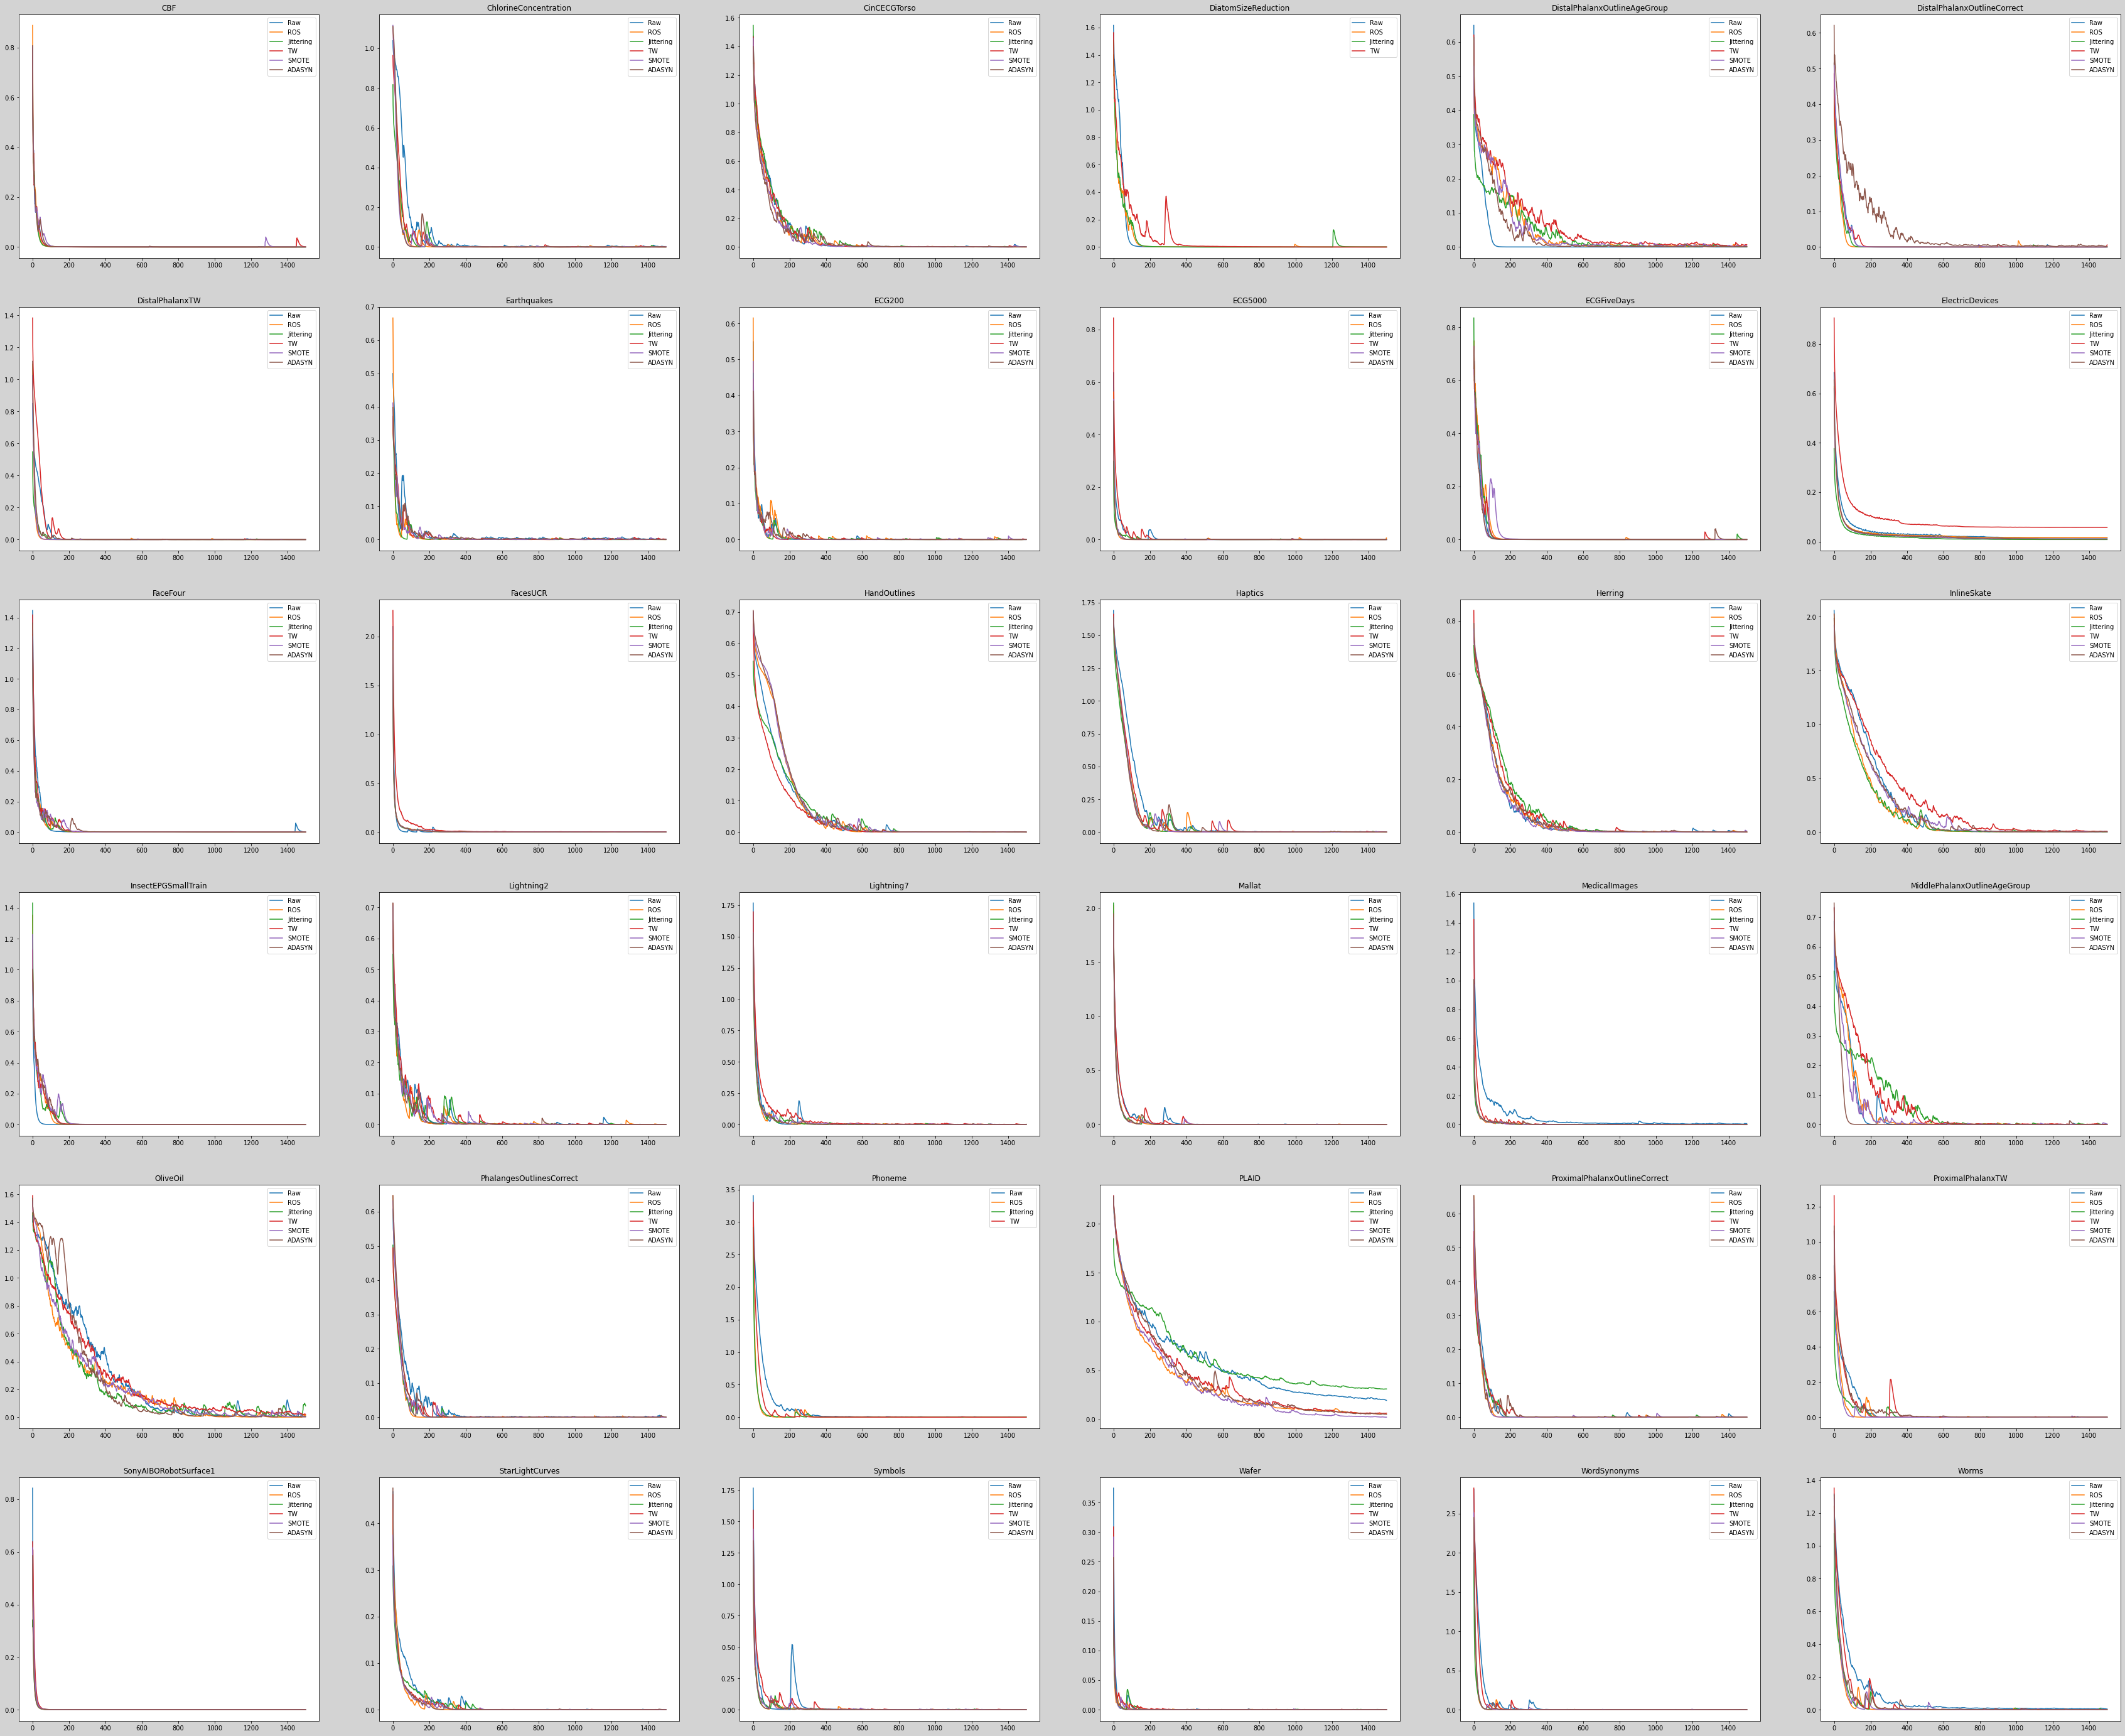

In [15]:
%matplotlib inline
dataset = os.listdir('data')
Da = ['Raw', 'ROS', 'Jittering', 'TW', 'SMOTE', 'ADASYN']
fig, ax = plt.subplots(6,6,figsize=(60, 50))
nb = 0
fig.set_facecolor('lightgrey')

for i in range(len(dataset)):
  
  trig = False
  for j in range(len( Da)):
    
    if (f'Classification{dataset[i]}  - {Da[j]} - loss' in df.columns):
      trig = trig or True
      
      
      
      loss = df[f'Classification{dataset[i]}  - {Da[j]} - loss'].ewm(10).mean()
      ax[nb//6][nb%6].plot(loss, label = Da[j])
      ax[nb//6][nb%6].set_title(dataset[i])
      ax[nb//6][nb%6].legend()
  if trig:
    nb+=1
    
    
  
  
    
    
    
  
    


plt.legend()
plt.show()

## validation loss


In [21]:
df = pd.read_csv('val_loss.csv')


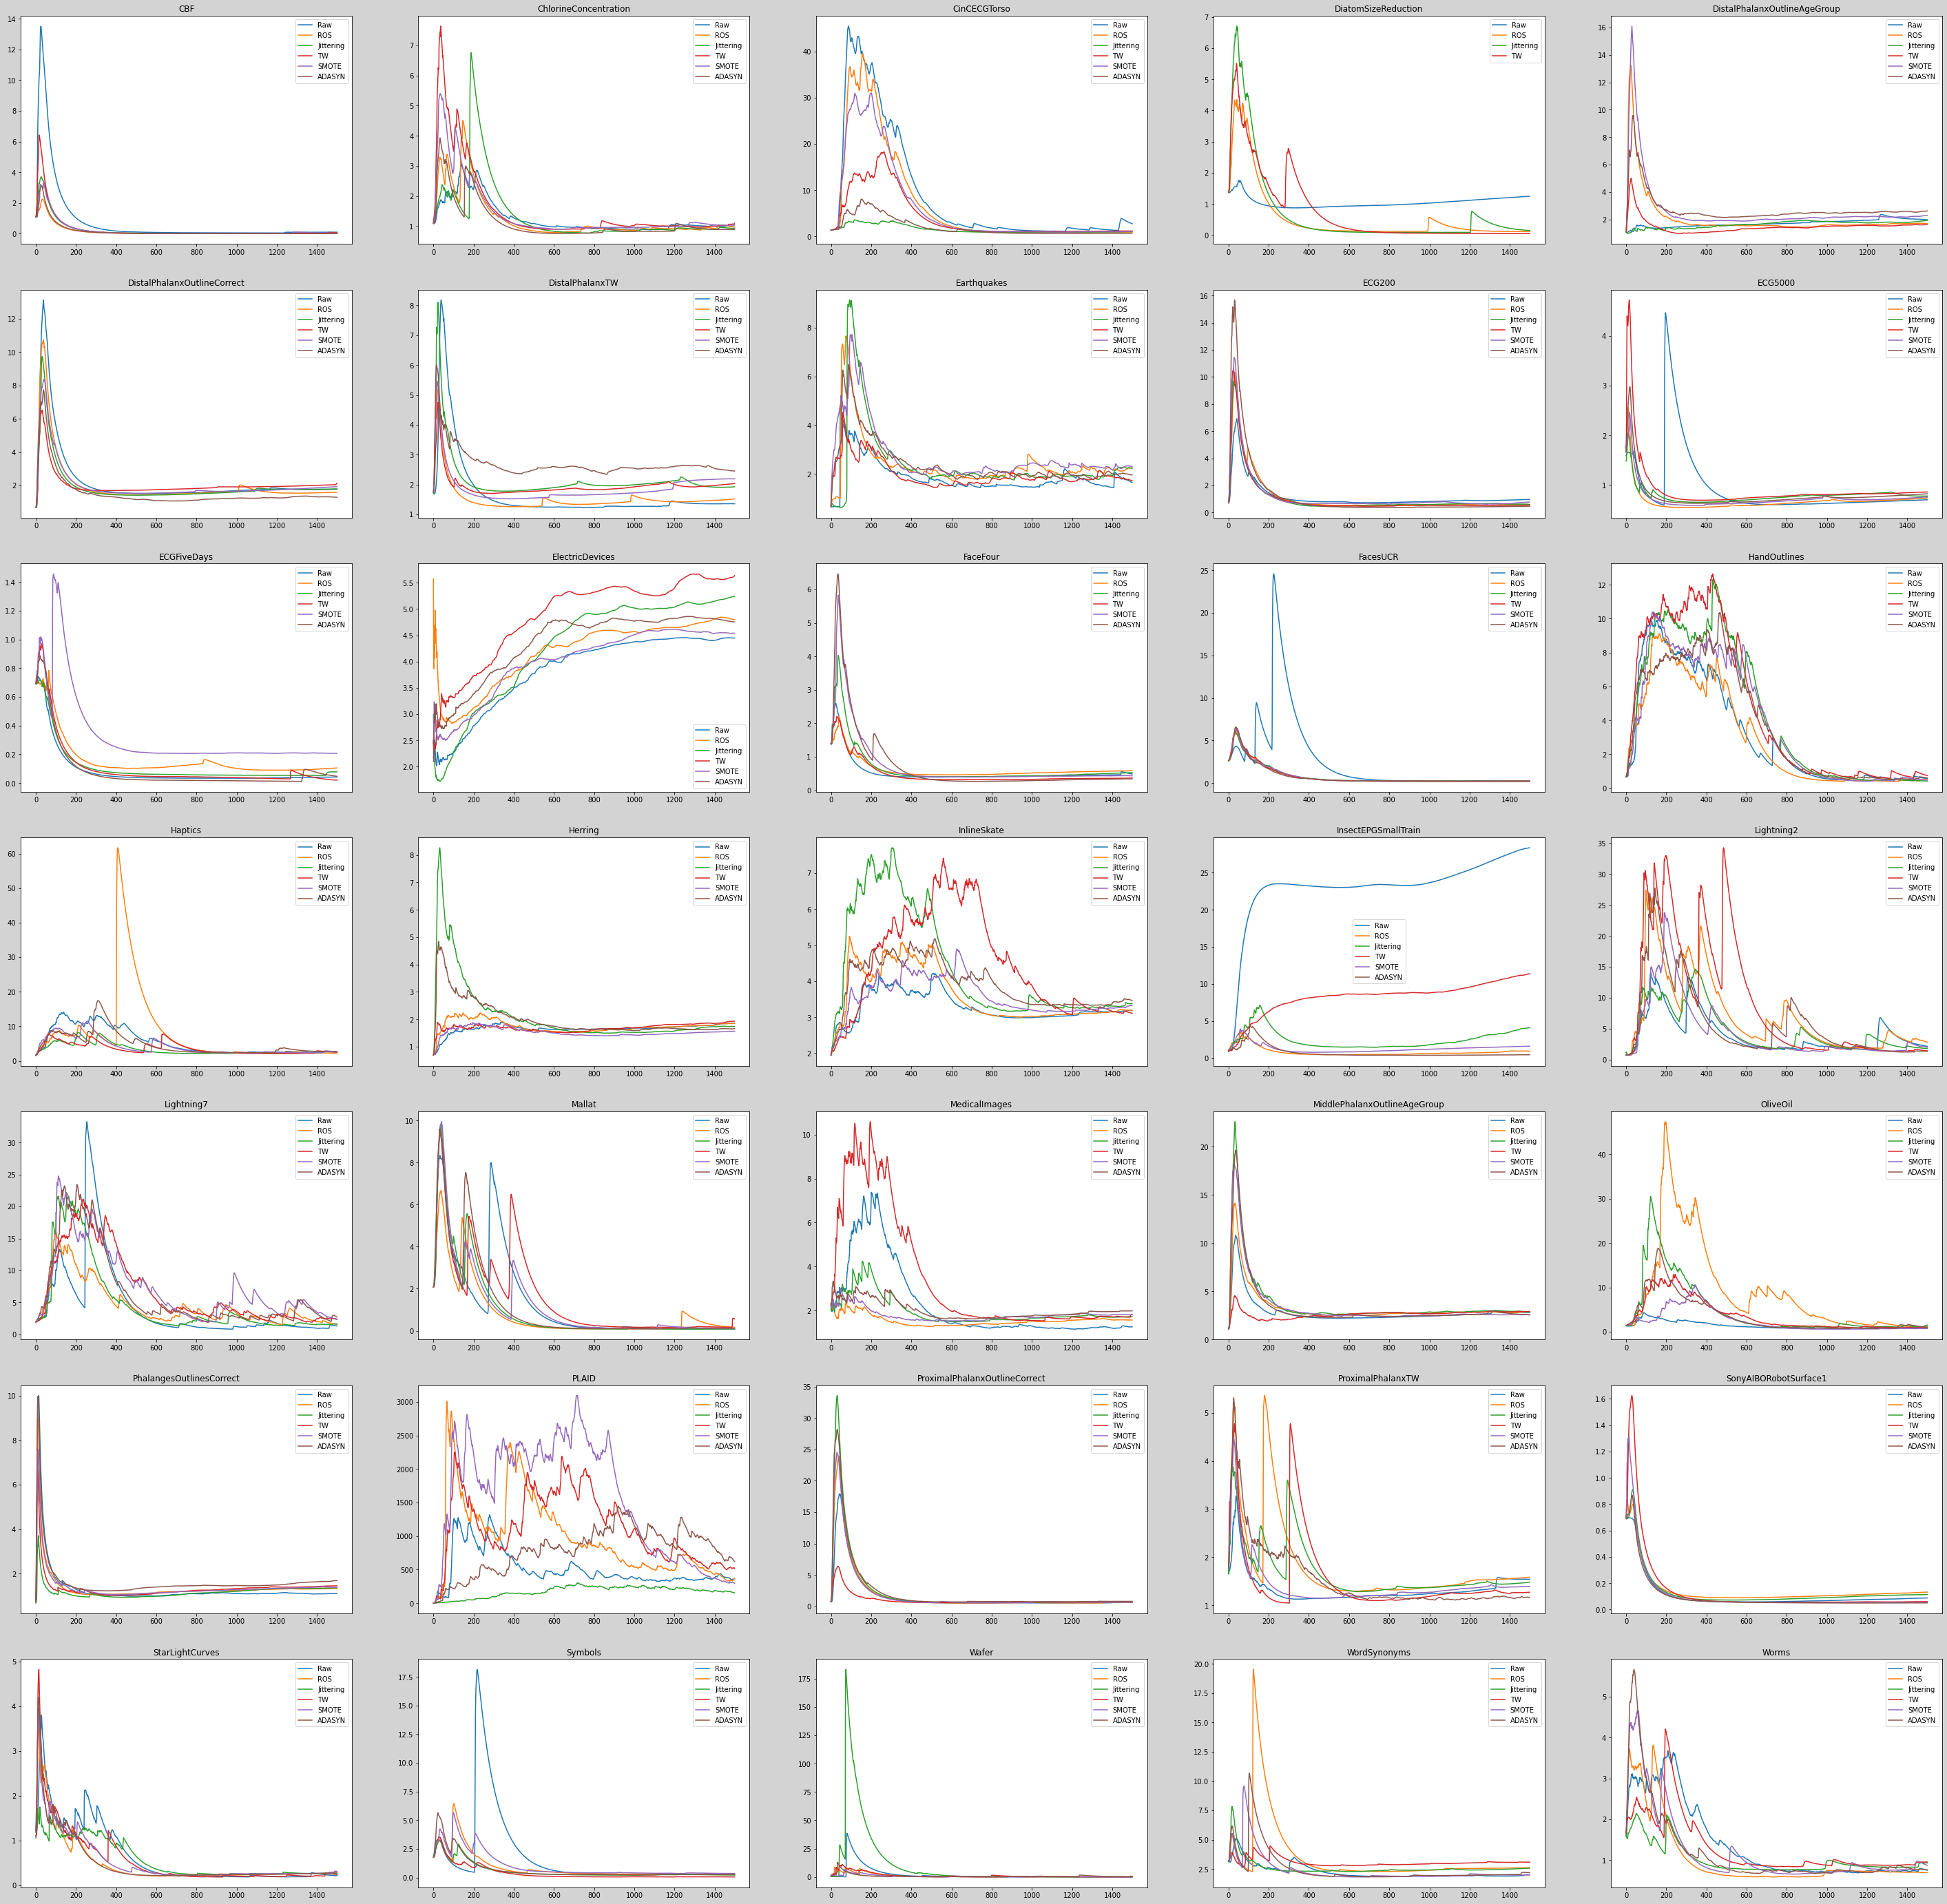

In [22]:
%matplotlib inline
dataset = os.listdir('data')
Da = ['Raw', 'ROS', 'Jittering', 'TW', 'SMOTE', 'ADASYN']
fig, ax = plt.subplots(7,5,figsize=(50, 50))
fig.set_facecolor('lightgrey')
nb = 0

for i in range(len(dataset)):
  if dataset[i] == 'Phoneme':
    continue
  trig = False
  for j in range(len( Da)):
    
    if (f'Classification{dataset[i]}  - {Da[j]} - val_loss' in df.columns):
      trig = trig or True
      
      
      
      loss = df[f'Classification{dataset[i]}  - {Da[j]} - val_loss'].ewm(99).mean()
      ax[nb//5][nb%5].plot(loss, label = Da[j])
      ax[nb//5][nb%5].set_title(dataset[i])
      ax[nb//5][nb%5].legend()
  if trig:
    nb+=1
    
    
  
  
    
    
    
  
    


plt.legend()
plt.show()

In [9]:
import pandas as pd
import numpy as np

# Performance Metrics

## Accuracy

In [57]:
d = 'Accuracy'
f = 'acc.csv'
df1 = pd.read_csv(f'Results/1-8/{d}/{f}')
df2 = pd.read_csv(f'Results/9-17/{d}/{f}')
df3 = pd.read_csv(f'Results/autres/{d}/{f}')
df4 = pd.read_csv(f'Results/oui/{d}/{f}')


df_acc = pd.concat([df1, df2,df3,df4],axis=0)
df_acc.rename(columns = {'Unnamed: 0': 'Dataset'}, inplace=True)
df_acc


,Dataset,Raw,ROS,Jittering,Time Warping,SMOTE,ADASYN
0,Earthquakes,0.571429,0.785714,0.742857,0.728571,0.757143,0.785714
1,CinCECGTorso,0.794203,0.804348,0.755072,0.772464,0.791304,0.849275
2,DiatomSizeReduction,0.320261,0.954248,0.973856,1.000000,0.000000,0.000000
3,DistalPhalanxTW,0.657143,0.642857,0.600000,0.571429,0.600000,0.557143
4,CBF,0.988889,1.000000,0.997778,1.000000,0.997778,0.995556
5,DistalPhalanxOutlineAgeGroup,0.771429,0.642857,0.714286,0.800000,0.771429,0.757143
6,DistalPhalanxOutlineCorrect,0.797101,0.775362,0.833333,0.768116,0.797101,0.797101
7,ChlorineConcentration,0.817187,0.847917,0.843229,0.838021,0.406771,0.841667
0,Haptics,0.493506,0.467532,0.487013,0.487013,0.500000,0.441558
1,Herring,0.625000,0.687500,0.593750,0.750000,0.625000,0.625000


# MCC

In [4]:
d = 'MCC'
f = 'mcc.csv'
df1 = pd.read_csv(f'Results/1-8/{d}/{f}')
df2 = pd.read_csv(f'Results/9-17/{d}/{f}')
df3 = pd.read_csv(f'Results/autres/{d}/{f}')
df4 = pd.read_csv(f'Results/oui/{d}/{f}')


df_mcc = pd.concat([df1, df2,df3,df4],axis=0)
df_mcc.rename(columns = {'Unnamed: 0': 'Dataset'}, inplace=True)
df_mcc


,Dataset,Raw,ROS,Jittering,Time Warping,SMOTE,ADASYN
0,Earthquakes,0.114708,0.070535,-0.025516,-0.047619,-0.105802,0.070535
1,CinCECGTorso,0.728843,0.741858,0.676485,0.698614,0.725841,0.803020
2,DiatomSizeReduction,0.179723,0.938578,0.964419,1.000000,0.000000,0.000000
3,DistalPhalanxTW,0.566238,0.550677,0.498213,0.453669,0.493837,0.448303
4,CBF,0.983494,1.000000,0.996671,1.000000,0.996672,0.993328
5,DistalPhalanxOutlineAgeGroup,0.622027,0.441028,0.527164,0.672071,0.633263,0.605854
6,DistalPhalanxOutlineCorrect,0.570367,0.525689,0.649808,0.560577,0.576780,0.576780
7,ChlorineConcentration,0.705385,0.747818,0.738886,0.729983,0.255175,0.737304
0,Haptics,0.372765,0.336702,0.359383,0.362372,0.377613,0.302675
1,Herring,0.248096,0.387378,0.180775,0.498071,0.260360,0.243095


# Recall

In [5]:
def j(l):
  """String of list -> List of String -> List of float
  ex : '[0.2888998, 0.15        ] -> ['0.2888998','0.15'] -> [0.2888998, 0.15]"""
  return list(map(float,list(filter(None,l.strip('][').split(' ')))))

In [6]:
def dp(df):
  """map j to all DataFrame
  
  TO DO : Make it cleaner
  """
  return list(map(j,df))

In [7]:
d = 'Recall'
f = 'rec.csv'
df1 = pd.read_csv(f'Results/1-8/{d}/{f}')
df2 = pd.read_csv(f'Results/9-17/{d}/{f}')
df3 = pd.read_csv(f'Results/autres/{d}/{f}')
df4 = pd.read_csv(f'Results/oui/{d}/{f}')


df_rec = pd.concat([df1, df2,df3,df4],axis=0)
df_rec.rename(columns = {'Unnamed: 0': 'Dataset'}, inplace=True)
df_rec = df_rec.set_index('Dataset')
df_rec = df_rec.apply(dp)
df_rec


,Raw,ROS,Jittering,Time Warping,SMOTE,ADASYN
Dataset,,,,,,
Earthquakes,"[0.57142857, 0.57142857]","[0.96428571, 0.07142857]","[0.91071429, 0.07142857]","[0.89285714, 0.07142857]","[0.94642857, 0.0]","[0.96428571, 0.07142857]"
CinCECGTorso,"[0.65921788, 0.79881657, 0.89204545, 0.8313253]","[0.67597765, 0.79881657, 0.92045455, 0.8253012]","[0.69273743, 0.67455621, 0.94886364, 0.69879518]","[0.67039106, 0.81065089, 0.90340909, 0.70481928]","[0.67597765, 0.71005917, 0.94318182, 0.8373494]","[0.72625698, 0.89349112, 0.95454545, 0.8253012]"
DiatomSizeReduction,"[1.0, 0.0, 0.0, 0.29411765]","[1.0, 1.0, 1.0, 0.58823529]","[1.0, 1.0, 1.0, 0.76470588]","[1.0, 1.0, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
DistalPhalanxTW,"[0.33333333, 0.0, 1.0, 0.85714286, 0.5, 0.7]","[0.33333333, 0.0, 1.0, 0.85714286, 0.33333333,...","[0.22222222, 0.2, 1.0, 0.85714286, 0.33333333,...","[0.33333333, 0.0, 1.0, 0.42857143, 0.25, 0.7]","[0.33333333, 0.2, 1.0, 0.71428571, 0.41666667,...","[0.44444444, 0.2, 1.0, 0.85714286, 0.16666667,..."
CBF,"[1.0, 1.0, 0.96478873]","[1.0, 1.0, 1.0]","[1.0, 1.0, 0.99295775]","[1.0, 1.0, 1.0]","[1.0, 0.99358974, 1.0]","[1.0, 0.99358974, 0.99295775]"
DistalPhalanxOutlineAgeGroup,"[0.72727273, 0.75862069, 1.0]","[0.42424242, 0.86206897, 0.75]","[0.66666667, 0.68965517, 1.0]","[0.78787879, 0.75862069, 1.0]","[0.84848485, 0.62068966, 1.0]","[0.75757576, 0.68965517, 1.0]"
DistalPhalanxOutlineCorrect,"[0.65454545, 0.89156627]","[0.67272727, 0.84337349]","[0.76363636, 0.87951807]","[0.87272727, 0.69879518]","[0.74545455, 0.8313253]","[0.74545455, 0.8313253]"
ChlorineConcentration,"[0.60666667, 0.86935167, 0.90929204]","[0.64666667, 0.93123772, 0.86061947]","[0.62, 0.94400786, 0.83849558]","[0.60888889, 0.95088409, 0.8119469]","[0.00888889, 0.33005894, 0.97566372]","[0.63777778, 0.92632613, 0.8539823]"
Haptics,"[0.51428571, 0.57142857, 0.35483871, 0.7241379...","[0.48571429, 0.53571429, 0.41935484, 0.5862069...","[0.57142857, 0.53571429, 0.4516129, 0.55172414...","[0.45714286, 0.57142857, 0.48387097, 0.5862069...","[0.48571429, 0.46428571, 0.5483871, 0.5862069,...","[0.45714286, 0.42857143, 0.41935484, 0.5517241..."


## Recall mean

In [12]:
df_mean_rec = np.array([[np.mean(x) for x in y] for y in df_rec.to_numpy()])
df_mean_rec = pd.DataFrame(df_mean_rec, index=df_rec.index, columns=df_rec.columns)
df_mean_rec

,Raw,ROS,Jittering,Time Warping,SMOTE,ADASYN
Dataset,,,,,,
Earthquakes,0.571429,0.517857,0.491071,0.482143,0.473214,0.517857
CinCECGTorso,0.795351,0.805137,0.753738,0.772318,0.791642,0.849899
DiatomSizeReduction,0.323529,0.897059,0.941176,1.000000,0.000000,0.000000
DistalPhalanxTW,0.565079,0.545635,0.535450,0.451984,0.535714,0.519709
CBF,0.988263,1.000000,0.997653,1.000000,0.997863,0.995516
DistalPhalanxOutlineAgeGroup,0.828631,0.678770,0.785441,0.848833,0.823058,0.815744
DistalPhalanxOutlineCorrect,0.773056,0.758050,0.821577,0.785761,0.788390,0.788390
ChlorineConcentration,0.795103,0.812841,0.800834,0.790573,0.438204,0.806029
Haptics,0.497454,0.469914,0.486612,0.490698,0.500790,0.442326


# Precision

## All precision values

In [14]:
d = 'Precision'
f = 'pres.csv'
df1 = pd.read_csv(f'Results/1-8/{d}/{f}')
df2 = pd.read_csv(f'Results/9-17/{d}/{f}')
df3 = pd.read_csv(f'Results/autres/{d}/{f}')
df4 = pd.read_csv(f'Results/oui/{d}/{f}')


df_prec = pd.concat([df1, df2,df3,df4],axis=0)
df_prec.rename(columns = {'Unnamed: 0': 'Dataset'}, inplace=True)
df_prec = df_prec.set_index('Dataset')
df_prec = df_prec.apply(dp)
df_prec

,Raw,ROS,Jittering,Time Warping,SMOTE,ADASYN
Dataset,,,,,,
Earthquakes,"[0.84210526, 0.25]","[0.80597015, 0.33333333]","[0.796875, 0.16666667]","[0.79365079, 0.14285714]","[0.79104478, 0.0]","[0.80597015, 0.33333333]"
CinCECGTorso,"[0.86131387, 0.69230769, 0.785, 0.87341772]","[0.82312925, 0.76704545, 0.75700935, 0.89542484]","[0.71676301, 0.76, 0.73568282, 0.82857143]","[0.74534161, 0.73262032, 0.77941176, 0.84782609]","[0.76100629, 0.85106383, 0.71861472, 0.87421384]","[0.94202899, 0.80319149, 0.79245283, 0.90131579]"
DiatomSizeReduction,"[0.2972973, 0.0, 0.0, 1.0]","[0.97777778, 0.88, 1.0, 1.0]","[0.97777778, 0.93617021, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
DistalPhalanxTW,"[0.5, 0.0, 0.85, 0.75, 0.66666667, 0.51851852]","[0.42857143, 0.0, 0.85, 0.66666667, 0.66666667...","[0.22222222, 0.33333333, 0.85, 0.66666667, 0.4...","[0.33333333, 0.0, 0.85, 0.6, 0.33333333, 0.538...","[0.375, 0.33333333, 0.85, 0.71428571, 0.555555...","[0.33333333, 0.5, 0.85, 0.6, 0.28571429, 0.473..."
CBF,"[1.0, 0.9689441, 1.0]","[1.0, 1.0, 1.0]","[1.0, 0.99363057, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 0.99300699]","[1.0, 0.99358974, 0.99295775]"
DistalPhalanxOutlineAgeGroup,"[0.77419355, 0.75862069, 0.8]","[0.7, 0.64102564, 0.54545455]","[0.70967742, 0.68965517, 0.8]","[0.78787879, 0.84615385, 0.72727273]","[0.71794872, 0.9, 0.72727273]","[0.73529412, 0.83333333, 0.66666667]"
DistalPhalanxOutlineCorrect,"[0.8, 0.79569892]","[0.74, 0.79545455]","[0.80769231, 0.84883721]","[0.65753425, 0.89230769]","[0.74545455, 0.8313253]","[0.74545455, 0.8313253]"
ChlorineConcentration,"[0.77118644, 0.8921371, 0.71602787]","[0.79945055, 0.87052342, 0.83297645]","[0.79036827, 0.83710801, 0.90453461]","[0.77840909, 0.83448276, 0.8995098]","[1.0, 0.88188976, 0.28729642]","[0.81303116, 0.85805278, 0.82478632]"
Haptics,"[0.58064516, 0.48484848, 0.40740741, 0.4666666...","[0.51515152, 0.51724138, 0.34210526, 0.4722222...","[0.55555556, 0.53571429, 0.4375, 0.44444444, 0...","[0.57142857, 0.48484848, 0.44117647, 0.4473684...","[0.70833333, 0.46428571, 0.44736842, 0.5151515...","[0.47058824, 0.44444444, 0.33333333, 0.4848484..."


## Mean precision values

In [15]:
df_mean_prec = np.array([[np.mean(x) for x in y] for y in df_prec.to_numpy()])
df_mean_prec = pd.DataFrame(df_mean_prec, index=df_prec.index, columns=df_prec.columns)
df_mean_prec

,Raw,ROS,Jittering,Time Warping,SMOTE,ADASYN
Dataset,,,,,,
Earthquakes,0.546053,0.569652,0.481771,0.468254,0.395522,0.569652
CinCECGTorso,0.803010,0.810652,0.760254,0.776300,0.801225,0.859747
DiatomSizeReduction,0.324324,0.964444,0.978487,1.000000,0.000000,0.000000
DistalPhalanxTW,0.547531,0.531471,0.519444,0.442521,0.551073,0.507122
CBF,0.989648,1.000000,0.997877,1.000000,0.997669,0.995516
DistalPhalanxOutlineAgeGroup,0.777605,0.628827,0.733111,0.787102,0.781740,0.745098
DistalPhalanxOutlineCorrect,0.797849,0.767727,0.828265,0.774921,0.788390,0.788390
ChlorineConcentration,0.793117,0.834317,0.844004,0.837467,0.723062,0.831957
Haptics,0.499025,0.480455,0.485552,0.493726,0.510899,0.451405


# F1 scores

In [16]:
d = 'F1_scores'
f = 'f1.csv'
df1 = pd.read_csv(f'Results/1-8/{d}/{f}')
df2 = pd.read_csv(f'Results/9-17/{d}/{f}')
df3 = pd.read_csv(f'Results/autres/{d}/{f}')
df4 = pd.read_csv(f'Results/oui/{d}/{f}')


df_f = pd.concat([df1, df2,df3,df4],axis=0)
df_f.rename(columns = {'Unnamed: 0': 'Dataset'}, inplace=True)
df_f = df_f.set_index('Dataset')
df_f = df_f.apply(dp)
df_f


,Raw,ROS,Jittering,Time Warping,SMOTE,ADASYN
Dataset,,,,,,
Earthquakes,"[0.68085106, 0.34782609]","[0.87804878, 0.11764706]","[0.85, 0.1]","[0.84033613, 0.0952381]","[0.86178862, 0.0]","[0.87804878, 0.11764706]"
CinCECGTorso,"[0.74683544, 0.74175824, 0.83510638, 0.85185185]","[0.74233129, 0.7826087, 0.83076923, 0.85893417]","[0.70454545, 0.71473354, 0.82878412, 0.75816993]","[0.70588235, 0.76966292, 0.83684211, 0.76973684]","[0.71597633, 0.77419355, 0.81572482, 0.85538462]","[0.82018927, 0.84593838, 0.86597938, 0.86163522]"
DiatomSizeReduction,"[0.45833333, 0.0, 0.0, 0.45454545]","[0.98876404, 0.93617021, 1.0, 0.74074074]","[0.98876404, 0.96703297, 1.0, 0.86666667]","[1.0, 1.0, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
DistalPhalanxTW,"[0.4, 0.0, 0.91891892, 0.8, 0.57142857, 0.5957...","[0.375, 0.0, 0.91891892, 0.75, 0.44444444, 0.6...","[0.22222222, 0.25, 0.91891892, 0.75, 0.3809523...","[0.33333333, 0.0, 0.91891892, 0.5, 0.28571429,...","[0.35294118, 0.25, 0.91891892, 0.71428571, 0.4...","[0.38095238, 0.28571429, 0.91891892, 0.7058823..."
CBF,"[1.0, 0.98422713, 0.98207885]","[1.0, 1.0, 1.0]","[1.0, 0.99680511, 0.99646643]","[1.0, 1.0, 1.0]","[1.0, 0.99678457, 0.99649123]","[1.0, 0.99358974, 0.99295775]"
DistalPhalanxOutlineAgeGroup,"[0.75, 0.75862069, 0.88888889]","[0.52830189, 0.73529412, 0.63157895]","[0.6875, 0.68965517, 0.88888889]","[0.78787879, 0.8, 0.84210526]","[0.77777778, 0.73469388, 0.84210526]","[0.74626866, 0.75471698, 0.8]"
DistalPhalanxOutlineCorrect,"[0.72, 0.84090909]","[0.7047619, 0.81871345]","[0.78504673, 0.86390533]","[0.75, 0.78378378]","[0.74545455, 0.8313253]","[0.74545455, 0.8313253]"
ChlorineConcentration,"[0.67910448, 0.88059701, 0.80116959]","[0.71498771, 0.89985762, 0.84657236]","[0.69489415, 0.88734995, 0.87026406]","[0.68329177, 0.88888889, 0.85348837]","[0.01762115, 0.4803431, 0.44388525]","[0.71481943, 0.89088333, 0.83913043]"
Haptics,"[0.54545455, 0.52459016, 0.37931034, 0.5675675...","[0.5, 0.52631579, 0.37681159, 0.52307692, 0.40...","[0.56338028, 0.53571429, 0.44444444, 0.4923076...","[0.50793651, 0.52459016, 0.46153846, 0.5074626...","[0.57627119, 0.46428571, 0.49275362, 0.5483871...","[0.46376812, 0.43636364, 0.37142857, 0.5161290..."


## F1 mean


In [18]:
df_mean_f = np.array([[np.mean(x) for x in y] for y in df_f.to_numpy()])
df_mean_f = pd.DataFrame(df_mean_f, index=df_f.index, columns=df_f.columns)
df_mean_f

,Raw,ROS,Jittering,Time Warping,SMOTE,ADASYN
Dataset,,,,,,
Earthquakes,0.514339,0.497848,0.475000,0.467787,0.430894,0.497848
CinCECGTorso,0.793888,0.803661,0.751558,0.770531,0.790320,0.848436
DiatomSizeReduction,0.228220,0.916419,0.955616,1.000000,0.000000,0.000000
DistalPhalanxTW,0.547682,0.523423,0.520349,0.441110,0.537327,0.493922
CBF,0.988769,1.000000,0.997757,1.000000,0.997759,0.995516
DistalPhalanxOutlineAgeGroup,0.799170,0.631725,0.755348,0.809995,0.784859,0.766995
DistalPhalanxOutlineCorrect,0.780455,0.761738,0.824476,0.766892,0.788390,0.788390
ChlorineConcentration,0.786957,0.820473,0.817503,0.808556,0.313950,0.814944
Haptics,0.485017,0.466874,0.482641,0.484921,0.500210,0.442153


# G scores

In [19]:
d = 'G_scores'
f = 'g.csv'
df1 = pd.read_csv(f'Results/1-8/{d}/{f}')
df2 = pd.read_csv(f'Results/9-17/{d}/{f}')
df3 = pd.read_csv(f'Results/autres/{d}/{f}')
df4 = pd.read_csv(f'Results/oui/{d}/{f}')


df_g = pd.concat([df1, df2,df3,df4],axis=0)
df_g.rename(columns = {'Unnamed: 0': 'Dataset'}, inplace=True)
df_g = df_g.set_index('Dataset')
df_g = df_g.apply(dp)
df_g


,Raw,ROS,Jittering,Time Warping,SMOTE,ADASYN
Dataset,,,,,,
Earthquakes,"[0.57142857, 0.57142857]","[0.26244533, 0.26244533]","[0.25505102, 0.25505102]","[0.25253814, 0.25253814]","[0.0, 0.0]","[0.26244533, 0.26244533]"
CinCECGTorso,"[0.79668491, 0.84072727, 0.90411232, 0.89420094]","[0.80098907, 0.85787752, 0.90957937, 0.89448374]","[0.79139785, 0.79243031, 0.91547875, 0.81657167]","[0.78524031, 0.85606851, 0.90791897, 0.8225404]","[0.79101786, 0.82549303, 0.9076937, 0.89743495]","[0.84550991, 0.91106411, 0.93425553, 0.89536371]"
DiatomSizeReduction,"[0.21417647, 0.0, 0.0, 0.54232614]","[0.99540227, 0.97208751, 1.0, 0.76696499]","[0.99540227, 0.98614252, 1.0, 0.87447463]","[1.0, 1.0, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
DistalPhalanxTW,"[0.56297415, 0.0, 0.97128586, 0.91100602, 0.68...","[0.55809982, 0.0, 0.97128586, 0.9035079, 0.567...","[0.44353276, 0.44027963, 0.97128586, 0.9035079...","[0.54822117, 0.0, 0.97128586, 0.64417854, 0.47...","[0.55318255, 0.44027963, 0.97128586, 0.8316309...","[0.62141504, 0.44376016, 0.97128586, 0.8959470..."
CBF,"[1.0, 0.99146013, 0.9822366]","[1.0, 1.0, 1.0]","[1.0, 0.99829787, 0.99647265]","[1.0, 1.0, 1.0]","[1.0, 0.99678972, 0.9983753]","[1.0, 0.99509305, 0.99485369]"
DistalPhalanxOutlineAgeGroup,"[0.76790663, 0.7931583, 0.98373875]","[0.59619322, 0.75346131, 0.83037108]","[0.71028481, 0.73366713, 0.98373875]","[0.79926256, 0.82741097, 0.97550649]","[0.77216099, 0.76838279, 0.97550649]","[0.75716615, 0.78890541, 0.96720415]"
DistalPhalanxOutlineCorrect,"[0.76391796, 0.76391796]","[0.75323326, 0.75323326]","[0.81953156, 0.81953156]","[0.78093381, 0.78093381]","[0.78721993, 0.78721993]","[0.78721993, 0.78721993]"
ChlorineConcentration,"[0.75712489, 0.87534255, 0.89907086]","[0.78393449, 0.88637876, 0.90271354]","[0.76732595, 0.86504272, 0.90313248]","[0.75932898, 0.86514658, 0.88840864]","[0.0942809, 0.55999338, 0.49856622]","[0.78047605, 0.87528221, 0.89793112]"
Haptics,"[0.67683324, 0.70308681, 0.55559052, 0.7649205...","[0.6483889, 0.69006556, 0.57803124, 0.70505563...","[0.7032765, 0.69313936, 0.62090515, 0.68077035...","[0.64112746, 0.70308681, 0.63963011, 0.6983724...","[0.6761234, 0.63954172, 0.67435898, 0.71496323...","[0.62289261, 0.6144518, 0.57507454, 0.69042715..."


## G mean

In [20]:
df_mean_g = np.array([[np.mean(x) for x in y] for y in df_g.to_numpy()])
df_mean_g = pd.DataFrame(df_mean_g, index=df_g.index, columns=df_g.columns)
df_mean_g

,Raw,ROS,Jittering,Time Warping,SMOTE,ADASYN
Dataset,,,,,,
Earthquakes,0.571429,0.262445,0.255051,0.252538,0.000000,0.262445
CinCECGTorso,0.858931,0.865732,0.828970,0.842942,0.855410,0.896548
DiatomSizeReduction,0.189126,0.933614,0.964005,1.000000,0.000000,0.000000
DistalPhalanxTW,0.642261,0.627509,0.670073,0.561083,0.677625,0.653777
CBF,0.991232,1.000000,0.998257,1.000000,0.998388,0.996649
DistalPhalanxOutlineAgeGroup,0.848268,0.726675,0.809230,0.867393,0.838683,0.837759
DistalPhalanxOutlineCorrect,0.763918,0.753233,0.819532,0.780934,0.787220,0.787220
ChlorineConcentration,0.843846,0.857676,0.845167,0.837628,0.384280,0.851230
Haptics,0.649922,0.634144,0.647527,0.650634,0.660661,0.614760


# Correlation

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
imb = pd.read_csv('Imbalanced_Measure_Dataset.csv')
imb = imb.drop('Unnamed: 0', axis=1)
imb.set_index('Dataset')



,TV,HL,KL,y_train distribution,Number of data in train set,TS length,Minority classes
Dataset,,,,,,,
ACSF1,0.000000,0.000000,0.000000,[10 10 10 10 10 10 10 10 10 10],100,1460,0
Adiac,0.327381,0.271293,0.146745,[13 10 5 14 4 12 10 13 9 11 10 12 6 11 12 ...,390,176,19
AllGestureWiimoteX,0.000000,0.000000,0.000000,[30 30 30 30 30 30 30 30 30 30],300,500,0
AllGestureWiimoteY,0.000000,0.000000,0.000000,[30 30 30 30 30 30 30 30 30 30],300,500,0
AllGestureWiimoteZ,0.000000,0.000000,0.000000,[30 30 30 30 30 30 30 30 30 30],300,500,0
...,...,...,...,...,...,...,...
Wine,0.103448,0.062778,0.030977,[30 27],57,234,1
WordSynonyms,0.870763,0.754841,0.532021,[ 6 60 5 35 5 17 4 24 6 12 6 8 3 10 4 ...,267,270,19
Worms,0.663333,0.477065,0.252331,[76 31 25 32 17],181,900,4


In [112]:
df_acc

,Dataset,Raw,ROS,Jittering,Time Warping,SMOTE,ADASYN
0,Earthquakes,0.571429,0.785714,0.742857,0.728571,0.757143,0.785714
1,CinCECGTorso,0.794203,0.804348,0.755072,0.772464,0.791304,0.849275
2,DiatomSizeReduction,0.320261,0.954248,0.973856,1.000000,0.000000,0.000000
3,DistalPhalanxTW,0.657143,0.642857,0.600000,0.571429,0.600000,0.557143
4,CBF,0.988889,1.000000,0.997778,1.000000,0.997778,0.995556
5,DistalPhalanxOutlineAgeGroup,0.771429,0.642857,0.714286,0.800000,0.771429,0.757143
6,DistalPhalanxOutlineCorrect,0.797101,0.775362,0.833333,0.768116,0.797101,0.797101
7,ChlorineConcentration,0.817187,0.847917,0.843229,0.838021,0.406771,0.841667
0,Haptics,0.493506,0.467532,0.487013,0.487013,0.500000,0.441558
1,Herring,0.625000,0.687500,0.593750,0.750000,0.625000,0.625000


## Accuracy 

In [68]:
delta_acc = df_acc.copy()
delta_acc.insert(1,'Delta_ROS', df_acc['ROS'] - df_acc['Raw'], True)
delta_acc.insert(1,'Delta_Jittering', df_acc['Jittering'] - df_acc['Raw'], True)
delta_acc.insert(1,'Delta_TW', df_acc['Time Warping'] - df_acc['Raw'], True)
delta_acc.insert(1,'Delta_SMOTE', df_acc['SMOTE'] - df_acc['Raw'], True)
delta_acc.insert(1,'Delta_ADASYN', df_acc['ADASYN'] - df_acc['Raw'], True)
delta_acc = delta_acc.drop(columns=['Raw','ROS','Jittering','Time Warping','SMOTE','ADASYN'])

delta_acc.set_index('Dataset')

,Delta_ADASYN,Delta_SMOTE,Delta_TW,Delta_Jittering,Delta_ROS
Dataset,,,,,
Earthquakes,0.214286,0.185714,0.157143,0.171429,0.214286
CinCECGTorso,0.055072,-0.002899,-0.021739,-0.039130,0.010145
DiatomSizeReduction,-0.320261,-0.320261,0.679739,0.653595,0.633987
DistalPhalanxTW,-0.100000,-0.057143,-0.085714,-0.057143,-0.014286
CBF,0.006667,0.008889,0.011111,0.008889,0.011111
DistalPhalanxOutlineAgeGroup,-0.014286,0.000000,0.028571,-0.057143,-0.128571
DistalPhalanxOutlineCorrect,0.000000,0.000000,-0.028986,0.036232,-0.021739
ChlorineConcentration,0.024479,-0.410417,0.020833,0.026042,0.030729
Haptics,-0.051948,0.006494,-0.006494,-0.006494,-0.025974


In [115]:
df_accu_cor = pd.merge(delta_acc, imb).drop('y_train distribution', axis = 1).corr()
df_accu_raw_cor = pd.merge(df_acc,imb).drop('y_train distribution', axis = 1).corr()
df_accu_cor

,Delta_ADASYN,Delta_SMOTE,Delta_TW,Delta_Jittering,Delta_ROS,TV,HL,KL,Number of data in train set,TS length,Minority classes
Delta_ADASYN,1.000000,0.839726,-0.423287,-0.013401,0.289112,-0.084082,-0.159063,-0.209647,0.020813,0.008167,-0.310076
Delta_SMOTE,0.839726,1.000000,-0.449042,-0.090921,0.221303,-0.068424,-0.085137,-0.096657,-0.004486,0.046600,-0.234373
Delta_TW,-0.423287,-0.449042,1.000000,0.721946,0.528446,-0.033077,0.100679,0.128483,-0.030337,-0.006292,-0.113396
Delta_Jittering,-0.013401,-0.090921,0.721946,1.000000,0.809365,-0.040552,0.115530,0.152921,-0.041402,-0.013663,-0.080599
Delta_ROS,0.289112,0.221303,0.528446,0.809365,1.000000,-0.038500,0.127664,0.208630,-0.079654,0.018142,-0.109816
TV,-0.084082,-0.068424,-0.033077,-0.040552,-0.038500,1.000000,0.922605,0.760312,0.024884,-0.394355,0.454021
HL,-0.159063,-0.085137,0.100679,0.115530,0.127664,0.922605,1.000000,0.924184,-0.055751,-0.319302,0.548953
KL,-0.209647,-0.096657,0.128483,0.152921,0.208630,0.760312,0.924184,1.000000,-0.221099,-0.246558,0.642946
Number of data in train set,0.020813,-0.004486,-0.030337,-0.041402,-0.079654,0.024884,-0.055751,-0.221099,1.000000,-0.108716,-0.011437
TS length,0.008167,0.046600,-0.006292,-0.013663,0.018142,-0.394355,-0.319302,-0.246558,-0.108716,1.000000,0.038829


This is the correlation matrix between Δ acc & different features of our datasets. </br>
A positive value indicates that when Δ acc & the feature evolve together (when Δ acc increase, the feature also increase & recip.).</br>
 A negative value indicates that when Δ acc & the feature evolve in opposite direction (when Δ acc increase, the feature decrease & recip.).

 /!\ This is only correlation value, it doesn't indicate any causality.

<ipython-input-106-d39643fac263>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//3][i%3].set_xticklabels(Da_names)


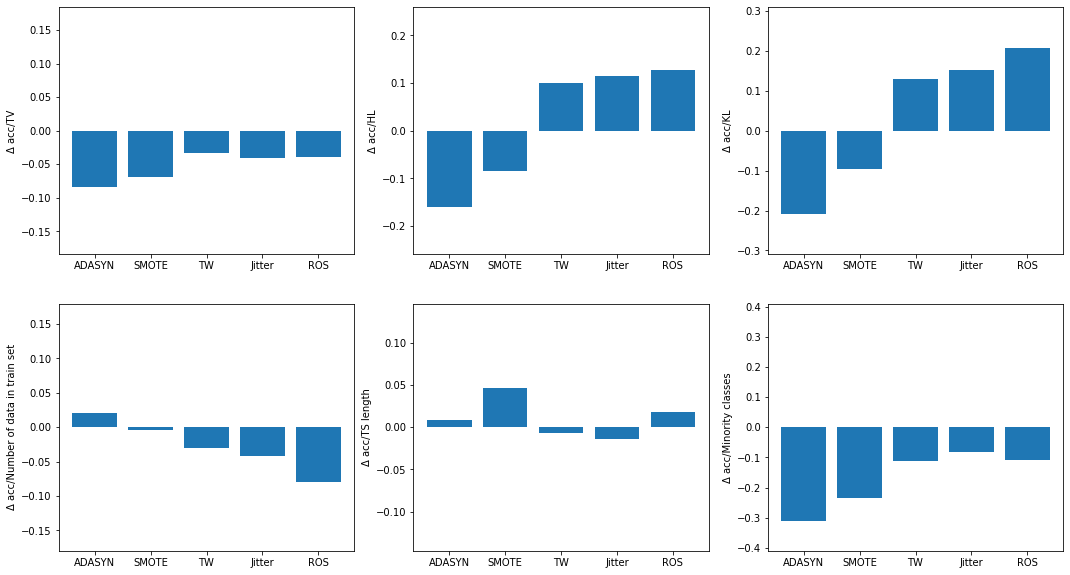

In [106]:
fig, ax = plt.subplots(2,3,figsize=(18, 10))
Da_names = [' ','ADASYN','SMOTE','TW','Jitter','ROS']
Da = ['Delta_ADASYN','Delta_SMOTE','Delta_TW','Delta_Jittering','Delta_ROS']
features = ['TV','HL'	,'KL'	,'Number of data in train set'	,'TS length','Minority classes']

#Corr between Delta & Train size
for i in range(len(features)):
    corr = [df_accu_cor[features[i]][x] for x in Da]
    ax[i//3][i%3].set_ylim(-max(np.abs(corr)+0.1),max(np.abs(corr)+0.1))
    
    ax[i//3][i%3].set_xticklabels(Da_names)
    ax[i//3][i%3].set(ylabel=f'Δ acc/{features[i]}')

    ax[i//3][i%3].bar([0,1,2,3,4],corr)
    

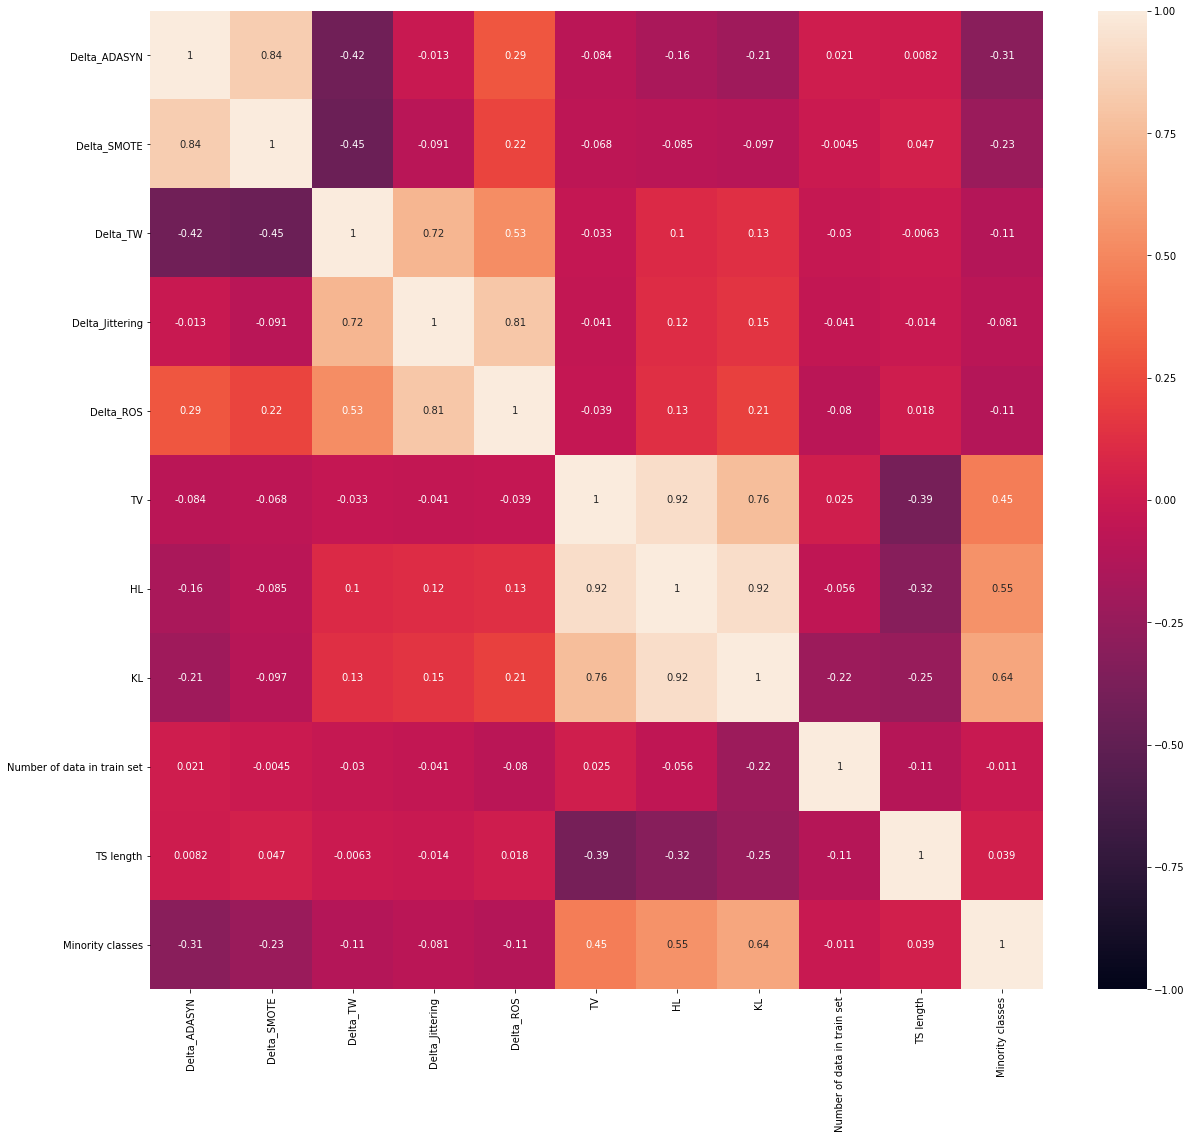

In [71]:
plt.figure(figsize=(20,18))
sns.heatmap(df_accu_cor,annot=True, vmin=-1, vmax=1)
plt.show()

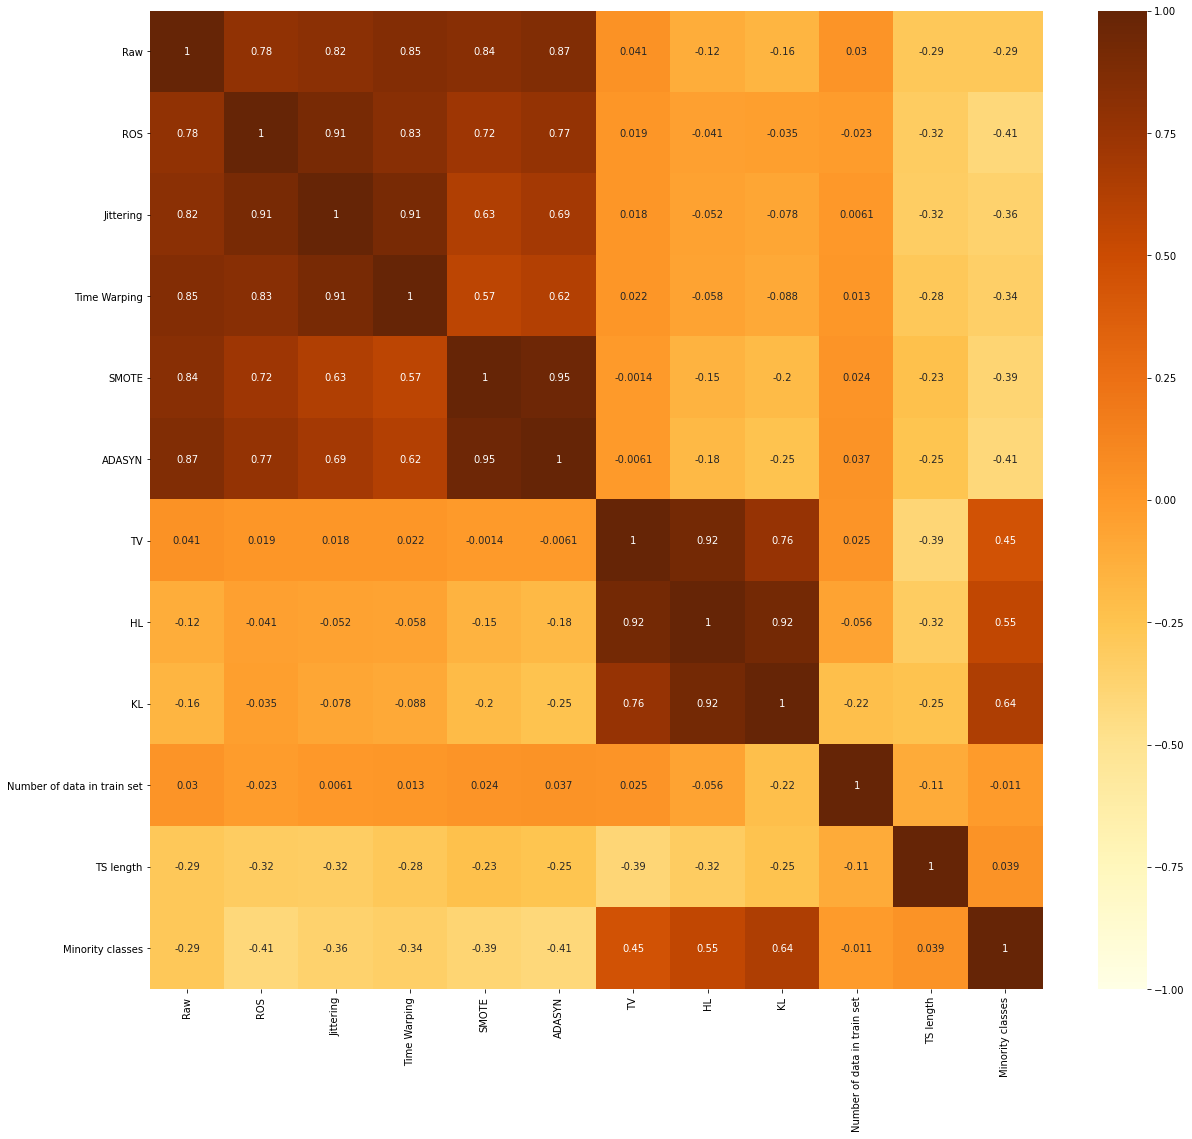

: 

In [117]:
plt.figure(figsize=(20,18))
sns.heatmap(df_accu_raw_cor,cmap="YlOrBr",annot=True, vmin=-1, vmax=1)
plt.show()

## MCC

In [109]:
delta_mcc = df_mcc.copy()
delta_mcc.insert(1,'Delta_ROS', df_mcc['ROS'] - df_mcc['Raw'], True)
delta_mcc.insert(1,'Delta_Jittering', df_mcc['Jittering'] - df_mcc['Raw'], True)
delta_mcc.insert(1,'Delta_TW', df_mcc['Time Warping'] - df_mcc['Raw'], True)
delta_mcc.insert(1,'Delta_SMOTE', df_mcc['SMOTE'] - df_acc['Raw'], True)
delta_mcc.insert(1,'Delta_ADASYN', df_mcc['ADASYN'] - df_mcc['Raw'], True)
delta_mcc = delta_mcc.drop(columns=['Raw','ROS','Jittering','Time Warping','SMOTE','ADASYN'])

delta_mcc.set_index('Dataset')

,Delta_ADASYN,Delta_SMOTE,Delta_TW,Delta_Jittering,Delta_ROS
Dataset,,,,,
Earthquakes,-0.044173,-0.677230,-1.623269e-01,-0.140223,-0.044173
CinCECGTorso,0.074178,-0.068362,-3.022878e-02,-0.052358,0.013015
DiatomSizeReduction,-0.179723,-0.320261,8.202770e-01,0.784696,0.758855
DistalPhalanxTW,-0.117935,-0.163306,-1.125691e-01,-0.068025,-0.015561
CBF,0.009834,0.007783,1.650557e-02,0.013177,0.016506
DistalPhalanxOutlineAgeGroup,-0.016173,-0.138166,5.004456e-02,-0.094862,-0.180998
DistalPhalanxOutlineCorrect,0.006413,-0.220322,-9.789299e-03,0.079441,-0.044678
ChlorineConcentration,0.031919,-0.562013,2.459814e-02,0.033501,0.042434
Haptics,-0.070090,-0.115894,-1.039327e-02,-0.013382,-0.036063


In [110]:
df_mcc_cor = pd.merge(delta_mcc, imb).drop('y_train distribution', axis = 1).corr()
df_mcc_cor

,Delta_ADASYN,Delta_SMOTE,Delta_TW,Delta_Jittering,Delta_ROS,TV,HL,KL,Number of data in train set,TS length,Minority classes
Delta_ADASYN,1.000000,0.589593,-0.456035,0.083995,0.552603,-0.132816,-0.113057,-0.099373,-0.001687,0.041301,-0.226505
Delta_SMOTE,0.589593,1.000000,-0.341596,-0.000941,0.259128,-0.091776,0.029940,0.122856,0.018355,0.065459,0.017673
Delta_TW,-0.456035,-0.341596,1.000000,0.619315,0.294596,-0.097715,0.041527,0.094395,-0.013709,-0.000899,-0.048505
Delta_Jittering,0.083995,-0.000941,0.619315,1.000000,0.723657,-0.118238,0.072137,0.155029,-0.039207,0.000943,-0.050696
Delta_ROS,0.552603,0.259128,0.294596,0.723657,1.000000,-0.099656,0.084583,0.192818,-0.072171,0.034284,-0.085445
TV,-0.132816,-0.091776,-0.097715,-0.118238,-0.099656,1.000000,0.922605,0.760312,0.024884,-0.394355,0.454021
HL,-0.113057,0.029940,0.041527,0.072137,0.084583,0.922605,1.000000,0.924184,-0.055751,-0.319302,0.548953
KL,-0.099373,0.122856,0.094395,0.155029,0.192818,0.760312,0.924184,1.000000,-0.221099,-0.246558,0.642946
Number of data in train set,-0.001687,0.018355,-0.013709,-0.039207,-0.072171,0.024884,-0.055751,-0.221099,1.000000,-0.108716,-0.011437
TS length,0.041301,0.065459,-0.000899,0.000943,0.034284,-0.394355,-0.319302,-0.246558,-0.108716,1.000000,0.038829


<ipython-input-111-12d45fced672>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//3][i%3].set_xticklabels(Da_names)


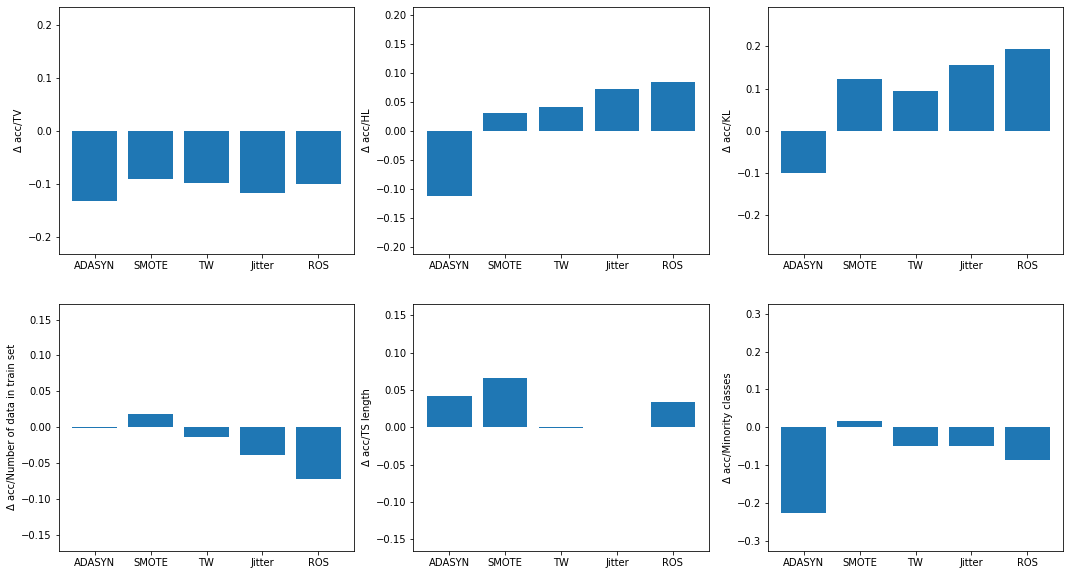

In [111]:
fig, ax = plt.subplots(2,3,figsize=(18, 10))
Da_names = [' ','ADASYN','SMOTE','TW','Jitter','ROS']
Da = ['Delta_ADASYN','Delta_SMOTE','Delta_TW','Delta_Jittering','Delta_ROS']
features = ['TV','HL'	,'KL'	,'Number of data in train set'	,'TS length','Minority classes']

#Corr between Delta & Train size
for i in range(len(features)):
    corr = [df_mcc_cor[features[i]][x] for x in Da]
    ax[i//3][i%3].set_ylim(-max(np.abs(corr)+0.1),max(np.abs(corr)+0.1))
    
    ax[i//3][i%3].set_xticklabels(Da_names)
    ax[i//3][i%3].set(ylabel=f'Δ acc/{features[i]}')

    ax[i//3][i%3].bar([0,1,2,3,4],corr)
    

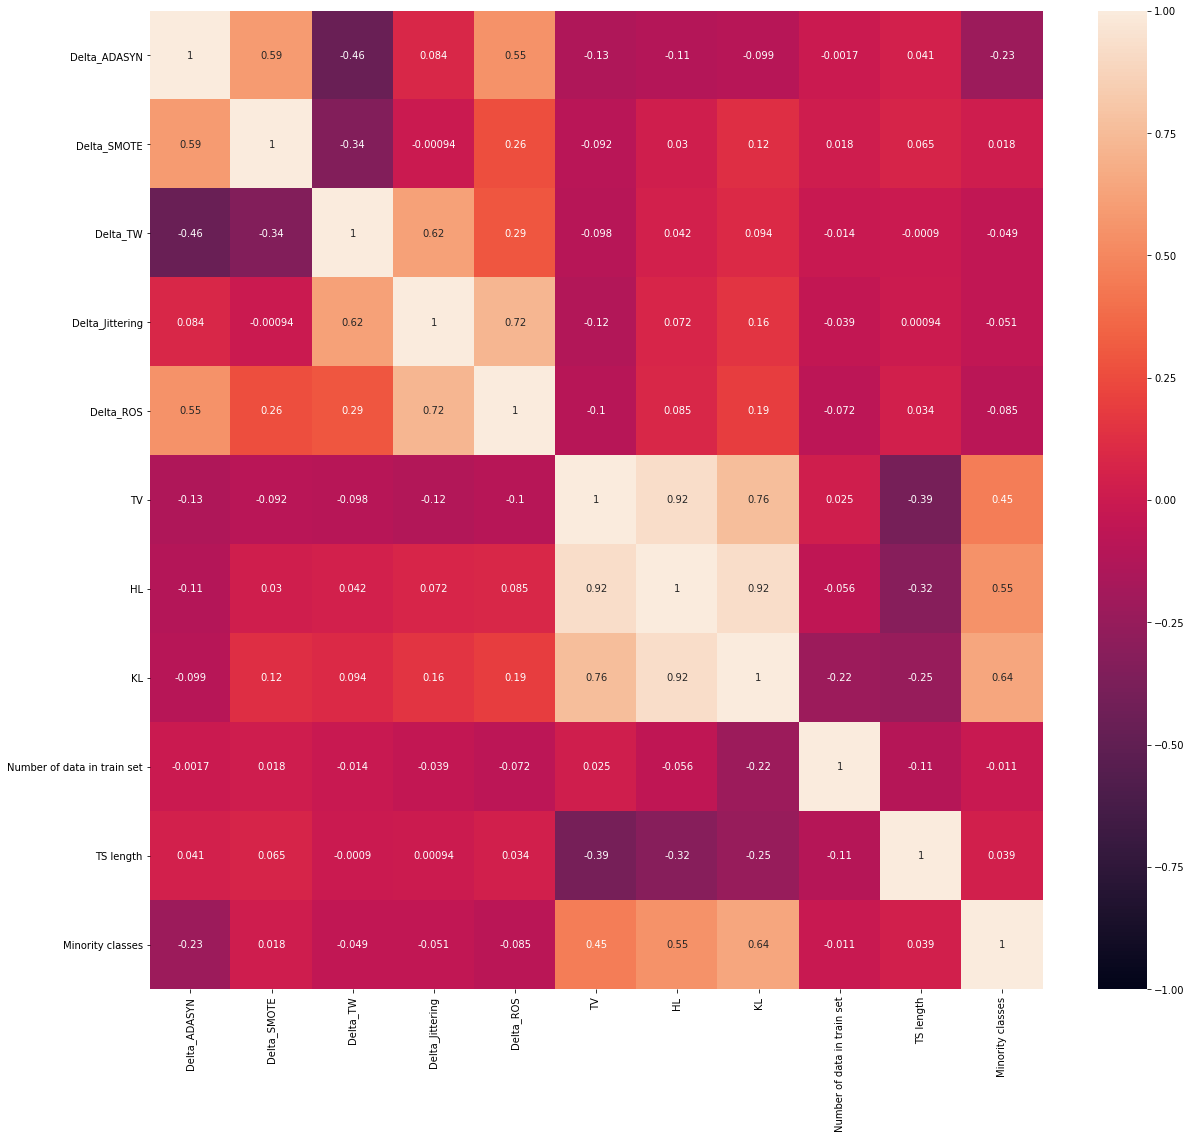

In [76]:
plt.figure(figsize=(20,18))
sns.heatmap(df_mcc_cor,annot=True, vmin=-1, vmax=1)
plt.show()